In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from sklearn.datasets import load_iris 
iris = load_iris() 

X = iris.data[:, :2] 
y = iris.target
X = X[y!=2, :]
y = y[y!=2]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1) 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

y_pred = gnb.predict(X_test) 

from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", 
      metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


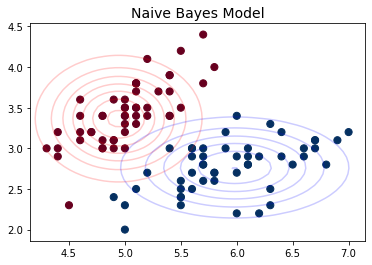

In [2]:
def plot_naive_bayes(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model', size=14)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        dist = scipy.stats.multivariate_normal(
            mean=model.theta_[label, :],
            cov=np.diag(model.sigma_[label, :])
        )
        P = dist.pdf(Xgrid)
        ax.contour(xx, yy, P.reshape(xx.shape),
                   colors=color, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)
plot_naive_bayes(X, y, gnb)